In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = open('dataset/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)

2690


In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(xs[7])
print(xs[8])
print(ys[7])
print(ys[7,15])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 11]
[ 0  0  0  0  0  0  0  0  0  0  0  0  2 11 15]
[0. 0. 0. ... 0. 0. 0.]
1.0


In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=18, verbose=1)
#print model.summary()
print(model)

Epoch 1/18
377/377 [==============================] - 12s 23ms/step - loss: 6.6659 - accuracy: 0.0705
Epoch 2/18
377/377 [==============================] - 9s 23ms/step - loss: 5.7674 - accuracy: 0.1190
Epoch 3/18
377/377 [==============================] - 9s 24ms/step - loss: 4.8637 - accuracy: 0.1676
Epoch 4/18
377/377 [==============================] - 9s 24ms/step - loss: 3.9441 - accuracy: 0.2344
Epoch 5/18
377/377 [==============================] - 9s 24ms/step - loss: 3.1010 - accuracy: 0.3372
Epoch 6/18
377/377 [==============================] - 8s 22ms/step - loss: 2.4259 - accuracy: 0.4509
Epoch 7/18
377/377 [==============================] - 8s 22ms/step - loss: 1.9616 - accuracy: 0.5428
Epoch 8/18
377/377 [==============================] - 8s 22ms/step - loss: 1.5921 - accuracy: 0.6227
Epoch 9/18
377/377 [==============================] - 9s 23ms/step - loss: 1.3767 - accuracy: 0.6642
Epoch 10/18
377/377 [==============================] - 9s 23ms/step - loss: 1.2249 - accur

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

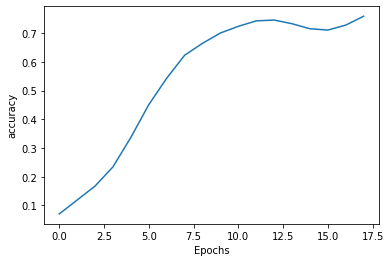

In [10]:
plot_graphs(history, 'accuracy')

In [11]:
seed_text = "Yesterday I"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted_index = np.argmax(predicted)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted_index:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Yesterday I heard a young man calling heard cry of the foaming main the bold peek trace old skibbereen the green daylight loud out gone and gone gone and gone gone and gone and gone and sea may trace far above as gone on eyes on their eyes gone gone and sea call gone daylight youth must falling gone and gone gone and gone and gone and sea call youth are thine gone and gone gone and gone and gone and gone and gone and gone and gone and gone and gone and gone and gone and gone and gone and gone
